## The Tutorial to Use AD4NS Datasets

As for data：

* All the datasets are stored in './data' as the default root path

* There are 11 dataset folders, as you can see, in the root directory, including 'nuscenes-mini', 'nuscenes-trianval0X', etc

* Every dataset folder consists of one detection input RGB image(.jpg, width=1600, height=900) and four text files(.json)

* Each json file stores input/output information of the detection/planning module, as indicated in its file name

* Besides there're two other folders, 'models' and 'algorithms'

* The object detection model files(.pth) are stored in the 'models' folder, while the planning algorithm files(.py) are stored in the 'algorithms' one

As for codes:

* All the codes are stored in './src' as the default root path, where only contains one file 'utils.py' for now

* The 'utils.py' file defines two useful classes, AD4NSDataset and AD4NSDataLoader, to load and render to visualize the datasets conveniently for users

* By the way, all the rendered results are already generated for each sample data in 'nuscenes-mini' dataset, where you can take a first look

The tutorial of how to use the two classes to utilize the datasets easily are as below in detail

In [1]:
import importlib
%load_ext autoreload
%autoreload 1
%aimport src.utils

importlib.reload(src.utils)

<module 'src.utils' from 'D:\\University\\OpenMMLab\\ad4ns\\src\\utils.py'>

In [2]:
from src.utils import AD4NSDataset, AD4NSDataLoader

### Step1: use AD4NSDataset to take a first look at nuscenes-mini dataset

In [62]:
# nuscenes-mini dataset
mini_dataset = AD4NSDataset(root="./data/datasets", version="mini", 
                       detector="FCOS3D", planner="AStar",
                       device="cuda:0")
print("The number of sample data in the dataset is {}".format(len(mini_dataset)))

The number of sample data in the dataset is 105


In [11]:
# detector: 3D object detection model
mini_dataset["detector"]

FCOSMono3D(
  (backbone): ResNet(
    (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (relu): ReLU(inplace=True)
    (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (layer1): ResLayer(
      (0): Bottleneck(
        (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (downsample): Sequential(
        

In [12]:
# planner: planning algorithm
mini_dataset["planner"]

In [63]:
idx, img, dif, dof, pif, pof = mini_dataset[0]
print(idx) # the index of sample data, the same index when you get item from dataset
print(img.shape) # the detection input RGB image(width=1600, height=900)

0
(900, 1600, 3)


In [16]:
dif

{'name': 'n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460',
 'file_name': './output/nuscenes-mini\\000\\detection input.jpg',
 'image_id': 'e3d495d4ac534d54b321f50006683844',
 'scene_id': 'cc8c0bf57f984915a77078b10eb33198',
 'width': 1600,
 'height': 900,
 'ego_pos': [1.70079118954, 0.0159456324149, 1.51095763913],
 'cam_intrinsic': [[1266.417203046554, 0.0, 816.2670197447984],
  [0.0, 1266.417203046554, 491.50706579294757],
  [0.0, 0.0, 1.0]]}

In [25]:
print(dof['detection model'])
print("The shape of bounding boxes is ({},{},{})".format(
    len(dof['gt_bboxes']), len(dof['gt_bboxes'][0]), len(dof['gt_bboxes'][0][0])
))
print(len(pif['pr_pts']))
print(pif['gt_pts'][0].keys())
print(len(pof['gt']['pathx']))

FCOS3D
The shape of bounding boxes is (48,8,3)
80
dict_keys(['ox', 'oy'])
46


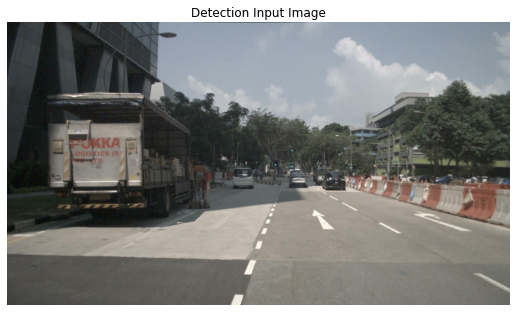

In [26]:
mini_dataset.render_detection_input(0) # show detection input image

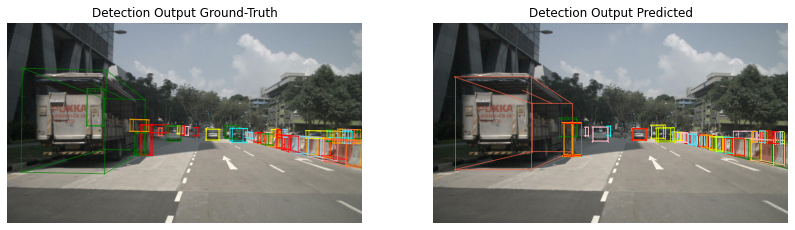

In [50]:
mini_dataset.render_detection_output(0) # show detection output images, both ground-truth and predicted

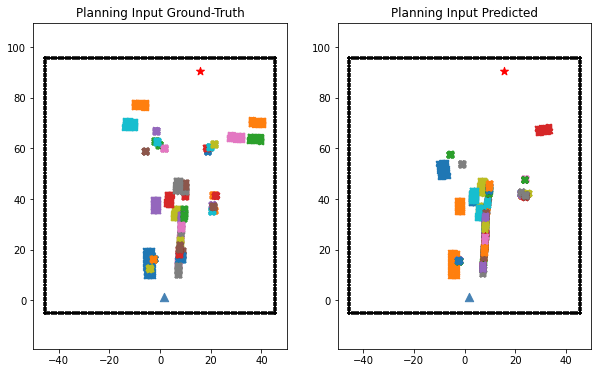

In [57]:
mini_dataset.render_planning_input(0) # show planning input graphs, both ground-truth and predicted

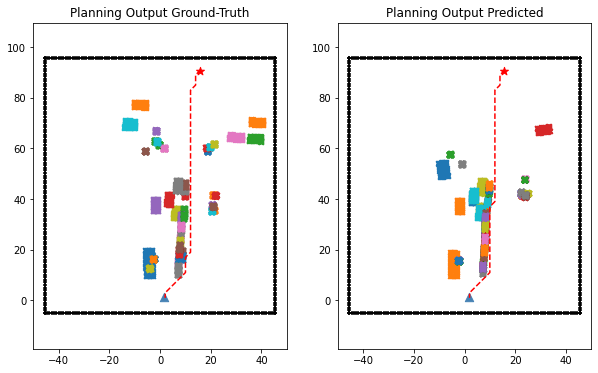

In [59]:
mini_dataset.render_planning_output(0) # show planning output graphs, both ground-truth and predicted

### Step2: use AD4NSDataLoader to use the whole nuscenes-trainval dataset in batch

In [61]:
# nuscenes-trainval dataset
trainval_dataset = AD4NSDataset(root="./data/datasets", version="trainval", 
                       detector="FCOS3D", planner="AStar",
                       device="cuda:0")
print("The number of sample data in the dataset is {}".format(len(trainval_dataset)))

The number of sample data in the dataset is 8747


In [72]:
# nuscenes-trainval dataloader
trainval_dataloader = AD4NSDataLoader(trainval_dataset, 
                                      batch_size=2, shuffle=False, num_workers=0)

In [75]:
# take a look at the first batch
idxs, imgs, difs, dofs, pifs, pofs = batch = next(iter(trainval_dataloader))
print(idxs)
print(imgs.shape)
print(len(difs), len(dofs), len(pifs), len(pofs))

[0, 1]
(2, 900, 1600, 3)
2 2 2 2


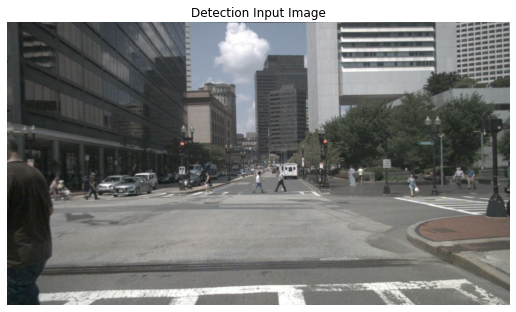

In [83]:
## the unified and easier way to render
seed = 42
# show detection input image
trainval_dataloader.render("di", idx="random", seed=seed) # "di" can be replaced by "detection input"

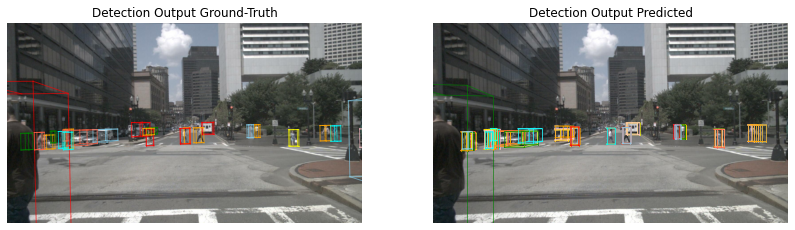

In [84]:
# show detection output images, both ground-truth and predicted
trainval_dataloader.render("do", idx="random", seed=seed) # "do" can be replaced by "detection output"

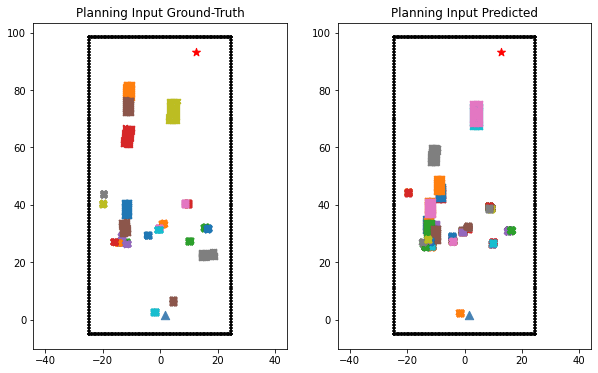

In [85]:
# show planning input graphs, both ground-truth and predicted
trainval_dataloader.render("pi", idx="random", seed=seed) # "pi" can be replaced by "planning input"

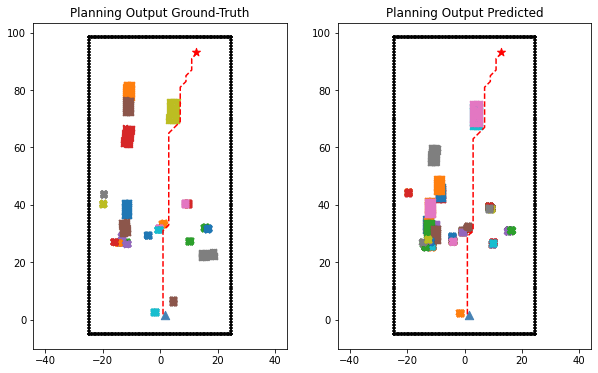

In [86]:
# show planning output graphs, both ground-truth and predicted
trainval_dataloader.render("po", idx="random", seed=seed) # "po" can be replaced by "planning output"